

# Project: TMDB MOVIE Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

### Dataset Description 

**In this Project We will be analysing Data associated with The Movie Database (TMDb); a popular, user editable database for movies and TV shows. 
Data set contains information about 10,000 movies collected, including user movies' popularity, budget and revenue, user rating as well as movie runtime and geners.**

### Question(s) for Analysis
**Have the no of movies released changed over the years ? Which year has the most number of movies ? Have vote counts been increased over years? Which year was with the highest average vote counts ?  which was with the highest average revenue ? Which was with the most costly budget for movies industry? Which was the most popular movie ? The longest movie ? Who is the director with the most no. of movies ? Which is the most popular movie as per the highest revenue ? Which were the top 10 Production companies with the most no. of movies ? Which Genre was the most released ?**

In [359]:
# Importing Libraries and packages needed for analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

**In this section of the report, We will be assessing Data, understanding its structure and identifying any problems associated to ensure the quality of the data as possible for analysis**.

In [360]:
# Loading  data 
df = pd.read_csv('tmdb-movies (1).csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [361]:
# Understanding Data Structure ; no. of columns and rows = df.shape [0]
df.shape 

(10866, 21)

In [362]:
Rows = df.shape[0]
Columns = df.shape[1]
print ("Number of Rows :", Rows)
print ("Number of Columns :", Columns)

Number of Rows : 10866
Number of Columns : 21


In [363]:
# inspecting Data information as name of columns, data types as well as memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As noticed:
- Data is with different types; floats, integers as well as objects. 
- Issue(1) : Some Columns may be irrelvant so they need to be dropped.
- Some columns seems to have missing values; 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'.   
- "Release date" is an 'object' type, so it has to be converted later to 'datetime' type if needed in our analysis.

In [364]:
# Check for Nan in columns 
check_nan = df.isnull().values.any()
print ("Does Data has Missing Values ?", check_nan)

Does Data has Missing Values ? True


In [365]:
# Dsiplay Sum of NanS in each Column
df.isnull().sum().sum()
count_nan_in_df = df.isnull().sum()
print (count_nan_in_df )

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


- Issue(2) : Seems that Most of Nan Values are of strings so can't be replaced with a mean value.

In [366]:
Dup_D = df.duplicated().any()
print("Are there any duplicates ?", Dup_D)

Are there any duplicates ? True


In [367]:
# Check for Duplicates in Data
Dup = sum(df.duplicated())
print('Sum of Duplicates =', Dup)

Sum of Duplicates = 1


- Issue(3) : Duplicated above has to be removed.

List of issues :
                - Issue (1) : Some Columns may be irrelvant and need to be dropped.
                - Issue (2) : Nan Values
                - Issue (3) : Duplicated has to be removed.
                - Issue (4) :- "Release date" is an 'object' type, so it has to be converted later to 'datetime' type.

In [368]:

# Data Summary Statistics; we included 'all' to include all columns categorical as well as numerical.
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


- The preliminary Statistics above allows a brief summary of : min/max values, mean, as well as standerd deviation.
- Reporting period starting year 1960 (min) to year 2015 (max).
- Average movie runtime is almost 102 minutes.
- Top movie was "Hamlet", a "Paramount Pictures" production 'Drama' for director "Woodey Allen", based on a true story. 


## Data Cleaning
**Handling stated issue by modifying, replacing or moving data to ensure high quality and well structure of the data as possible.**
 

In [369]:
# Handling issue(1) : Drop extraneous columns in the data set.
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [370]:
# Check dropping irrelevant columns, by visiting last 2 rows in the data set.
df.tail(2)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,release_year
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,1966
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1966


In [371]:
# Handling issue(2) : Nan Values
# drop rows with any null values in dataset
df.dropna(inplace=True)


In [372]:
# Drop Nan values in rows or columns from our DataFrame. 
# The .dropna(axis) method eliminates any rows with NaN values when axis = 0.
df.dropna(axis=0)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,2015
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,2015
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,2015
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,2015
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,2015


In [373]:
# Check if any columns have null values – should print false
null = df.isnull().sum().any()
print("Are there still any Nan vaLues ? ", null)

Are there still any Nan vaLues ?  False


In [374]:
# Handling Issue(3) : Duplicates have to be removed.
df.drop_duplicates(inplace = True)

In [375]:
# Rechedk duplicates
Dup_Data = df.duplicated().any()
print("Are there still any duplicates ?", Dup_Data)

Are there still any duplicates ? False


In [376]:
# Handling Issue(4) : Converting "Release date" to 'datetime' type, instead of 'object' type.
df['release_date'] = pd.to_datetime(df['release_date'])

In [377]:
# Check Converting "Release date" to 'datetime' type.
df['release_date'].dtypes

dtype('<M8[ns]')

In [378]:
df.shape

(8666, 14)

The above shape is the one istead of (10866, 21), after dropiing all extraneous columns, Nans as well as duplicates in the data set(10866, 21)

<a id='eda'></a>
## Exploratory Data Analysis

**In this section, We will be addressing the research questions posed above in the Introduction. 
Investigation will be through exploring and augmenting data, comparing and showing trends, finding relations between different variables as well as visulaizing these releationships.
The Exploration will be be performed from multiple angles as possible to maximize the potetial of the analysis proces, Visualization as well as models.

** First lets have a general look of the dataset**

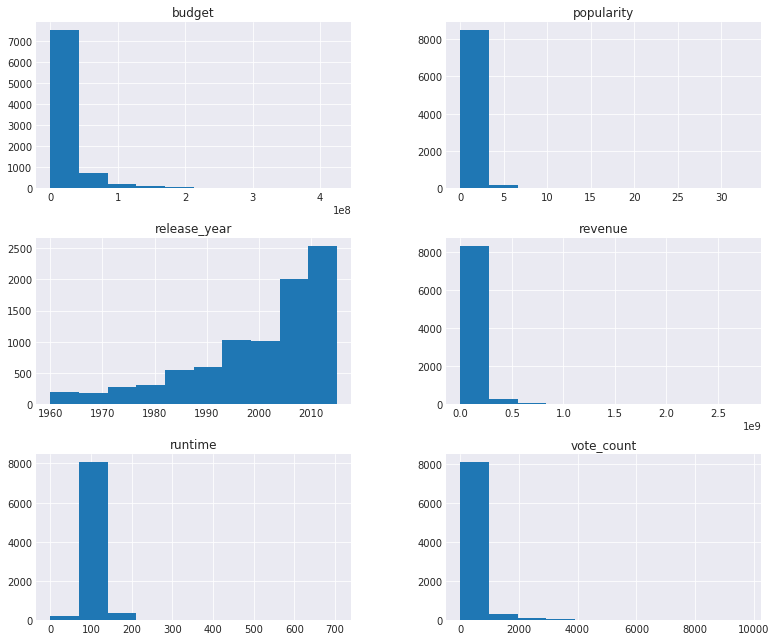

In [379]:
df.hist(figsize= (13,11));

### Research Questions - 1 
**A Qucik Analysis of the Movie industry all over the years during the analysis period ** 

**Have the no of movies released changed over the years ? Which year has the most number of movies ? Which Genres were the most released all over the years ?**

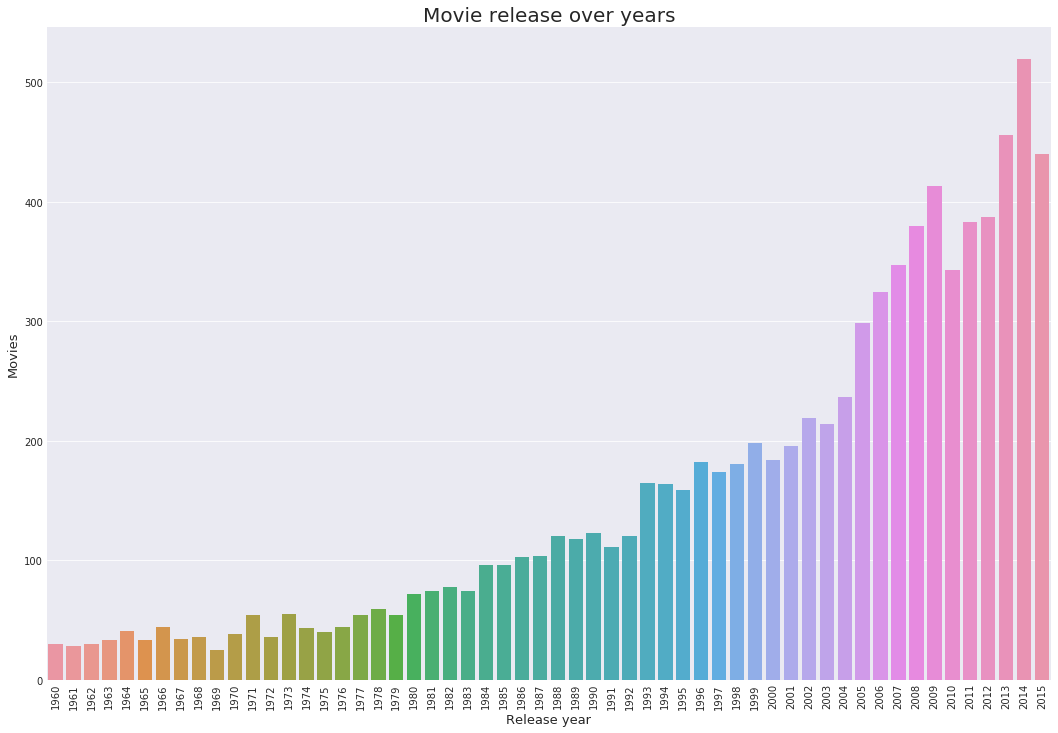

In [380]:
plt.figure(figsize = (18,12))
sns.countplot(df['release_year'])
plt.title('Movie release over years', fontsize=20)
plt.xlabel('Release year', fontsize=13)
plt.ylabel('Movies', fontsize=13)
plt.xticks(rotation=90)
plt.show;

The above graph shows the increase in the release of movies over the years.
Its also clear that 2014 is the year with the most no of movies released, followed by 2013 and then 2015.

In [381]:
print('In 2014 {} movies have been released, followed by 2013 where {} movies have been released and then 2015 with {}  movies.'.format(df['release_year'][df['release_year']==2014].count(), df['release_year'][df['release_year']==2013].count(), df['release_year'][df['release_year']==2015].count()))

In 2014 520 movies have been released, followed by 2013 where 456 movies have been released and then 2015 with 440  movies.


The above graph clarifies that the last quarter of the year seems to be the high season of Movies Release within the year.
'September' was the month with the most no of movies, then 'October', followed by 'November'.

In [382]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'release_year'],
      dtype='object')

In [383]:
df_genres = df['genres'].str.get_dummies(sep='|')
df_genres1 = df_genres.sum().reset_index()

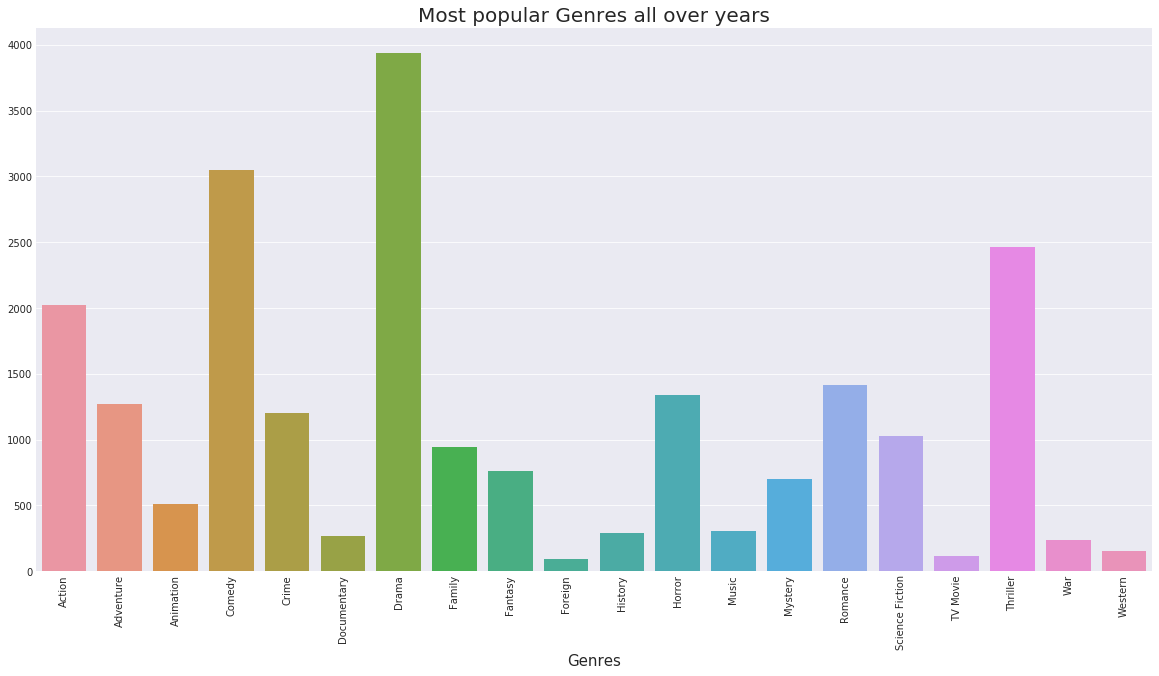

In [384]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_genres.columns, y=df_genres.sum(), data = df_genres1)
plt.title('Most popular Genres all over years', fontsize = 20)
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

### Research Questions - 2 
****Which month with the most no of movies release ? Which year was with the highest average vote counts ?  Which was with the highest average revenue ? Which was with the most costly budget in the movies industry? **

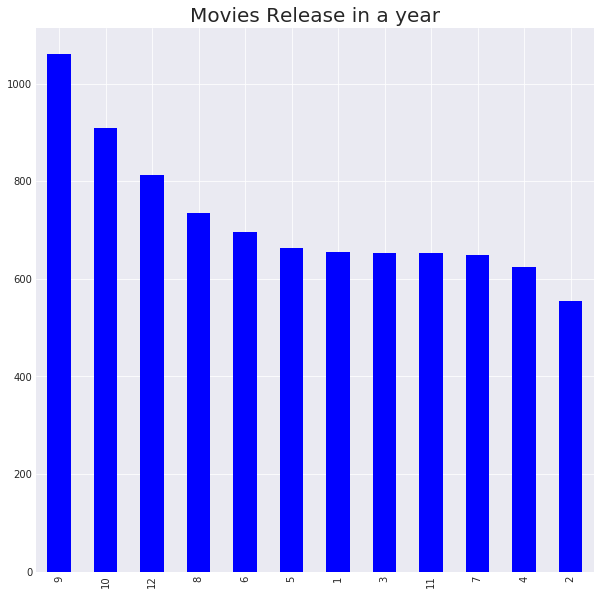

In [385]:
plt.figure(figsize = (10,10));
df['release_date'].dt.month.value_counts().plot.bar(color='blue')
plt.title('Movies Release in a year', fontsize=20)
plt.show();

The above graph clarifies that the last quarter of the year seems to be the high season of Movies Release within the year.
'September' was the month with the most no of movies, then 'October', followed by 'November'.

In [386]:
df.groupby('release_year')['vote_count'].mean().sort_values(ascending=False)

release_year
2012    457.204134
2013    447.388158
2015    399.131818
2014    380.196154
2010    365.565598
2011    343.271540
2004    327.666667
2001    316.841837
2003    310.719626
2009    281.682809
2002    278.899543
1999    267.505051
2008    256.334211
2007    251.922190
2000    241.429348
2005    239.200669
1997    233.333333
2006    227.080000
1994    226.347561
1995    222.817610
1998    216.497238
1990    174.268293
1979    162.777778
1992    159.033333
1984    155.791667
1989    154.923729
1975    150.725000
1980    150.277778
1972    149.638889
1991    149.459459
1977    148.037037
1993    146.090909
1982    145.423077
1987    141.067308
1985    140.729167
1996    140.120879
1983    132.000000
1986    129.689320
1974    119.744186
1988    116.966667
1968    115.972222
1976    106.068182
1981     98.891892
1973     94.054545
1971     93.277778
1967     88.764706
1963     85.000000
1961     84.285714
1960     81.866667
1978     81.203390
1962     78.800000
1964     76.243902

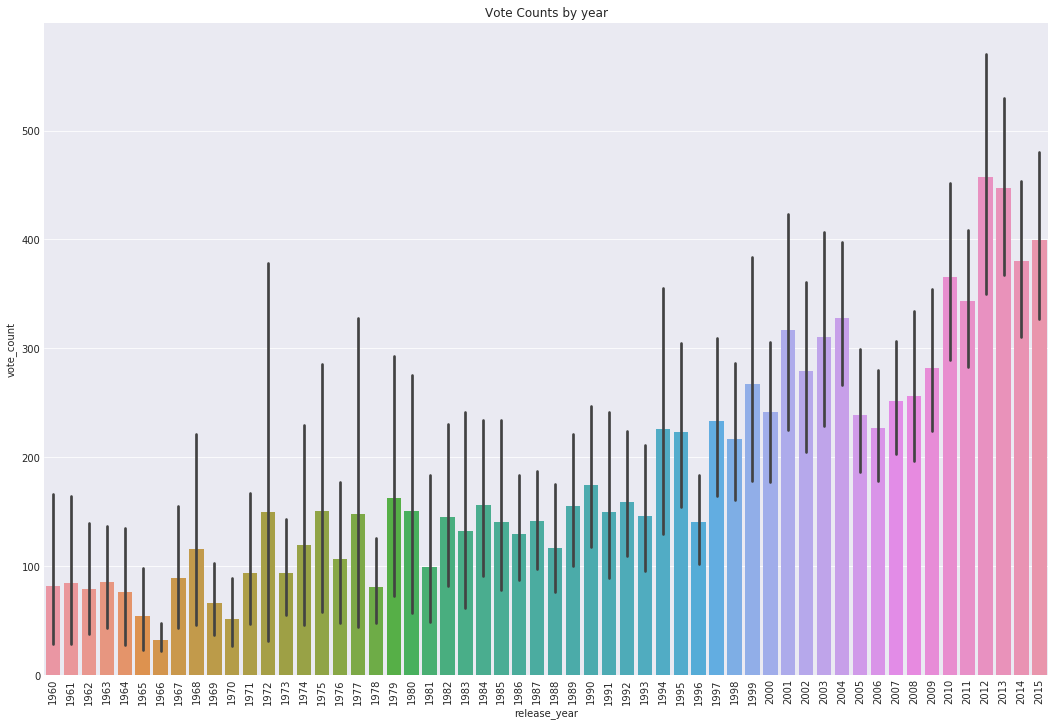

In [387]:
plt.figure(figsize = (18,12))
sns.barplot(x='release_year', y='vote_count', data=df);
plt.title('Vote Counts by year')
plt.xticks(rotation=90);

This shows that the highest average votes were in 2012.

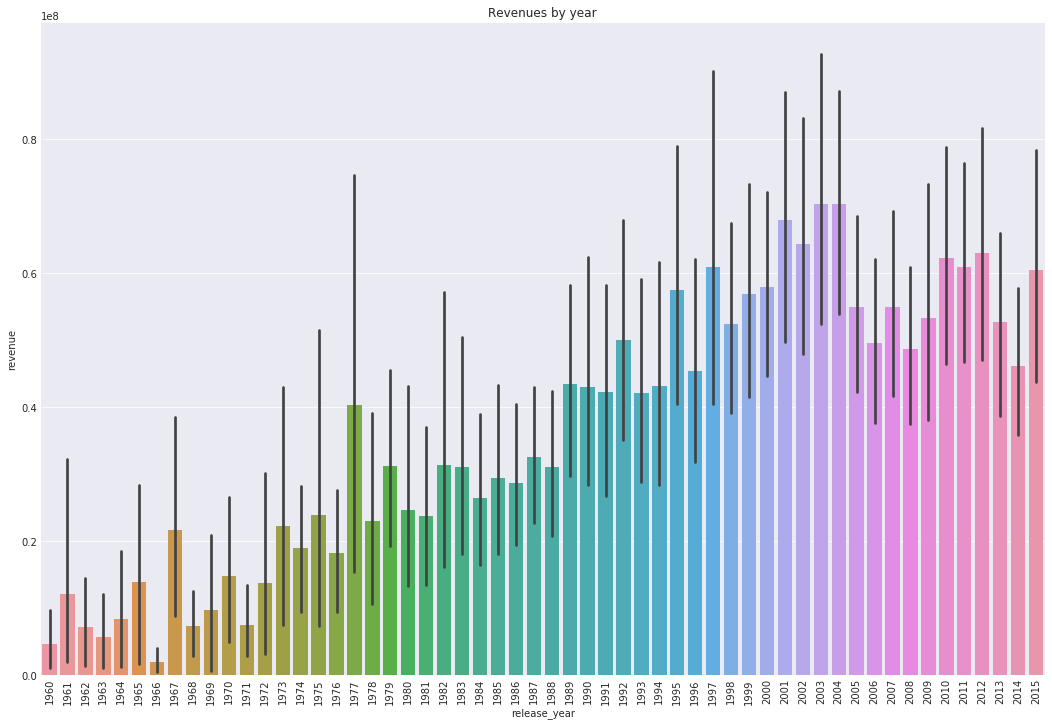

In [388]:
plt.figure(figsize = (18,12))
sns.barplot(x='release_year', y='revenue', data=df);
plt.title('Revenues by year')
plt.xticks(rotation=90);

This shows that the highest average revenues were in 2003 as well as 2004.

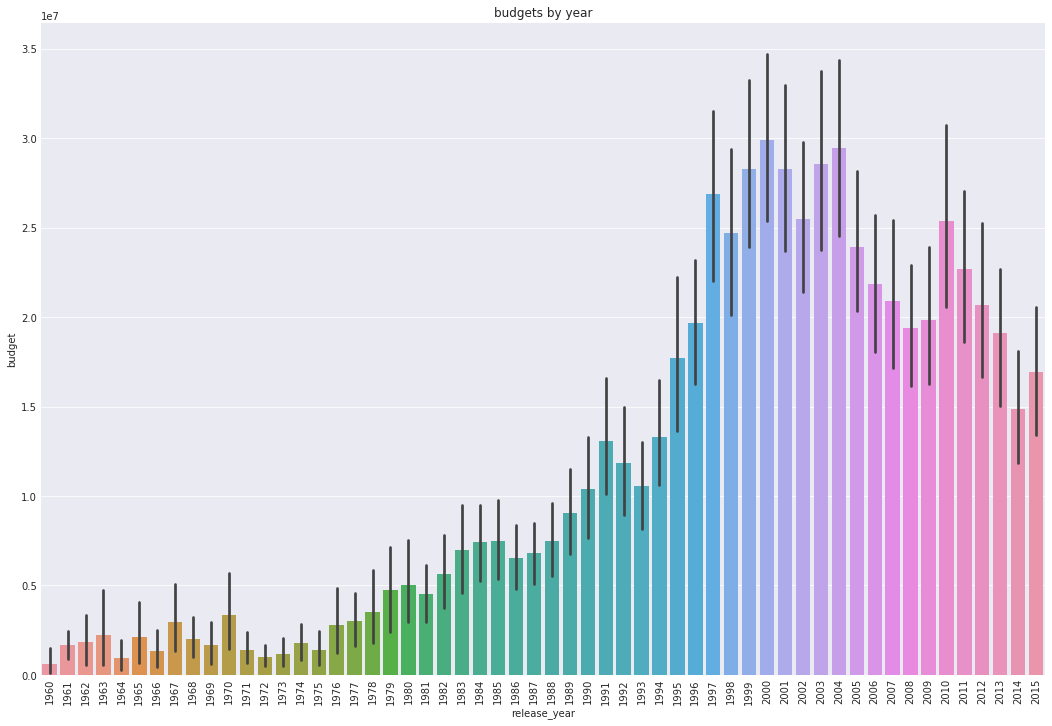

In [389]:
plt.figure(figsize = (18,12))
sns.barplot(x='release_year', y='budget', data=df);
plt.title('budgets by year')
plt.xticks(rotation=90);

This clarifies that the movies budget were increasing till almost 2004, then had been affected for like 5 years to increase again by 2010.
Year 2000 with the most costly budget for movie industry, then 2004, followed by 1999.

This clearly shows that 'Action' was the most released movie genres, then 'Adventure', followed by 'Animation'

### Research Questions - 3 
**Which was the most popular movie ? The longest movie ? Who is the director with the most no. of movies ? Which is the most popular movie as per the highest revenue ?**

In [390]:
top10_popular = df.nlargest(10, 'popularity')[['original_title', 'popularity', 'release_year', 'director']].set_index('original_title', 'release_year', 'director')
top10_popular

,,popularity,release_year,director
,original_title,,,
0,Jurassic World,32.985763,2015,Colin Trevorrow
1,Mad Max: Fury Road,28.419936,2015,George Miller
629,Interstellar,24.949134,2014,Christopher Nolan
630,Guardians of the Galaxy,14.311205,2014,James Gunn
2,Insurgent,13.112507,2015,Robert Schwentke
631,Captain America: The Winter Soldier,12.971027,2014,Joe Russo|Anthony Russo
1329,Star Wars,12.037933,1977,George Lucas
632,John Wick,11.422751,2014,Chad Stahelski|David Leitch
3,Star Wars: The Force Awakens,11.173104,2015,J.J. Abrams


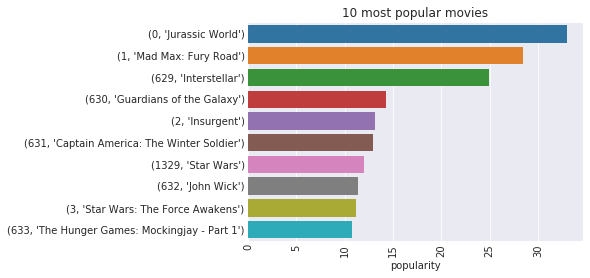

In [391]:
sns.barplot(x='popularity', y=top10_popular.index, data=top10_popular);
plt.title('10 most popular movies')
plt.xticks(rotation=90);

The above bar chart demonstrates the top 10 popular movies all over the report period, with 'Jurassic World' the most popular, directed by 'Colin Trevorrow' released 2015.

In [392]:
top10_runtime = df.nlargest(10, 'runtime')[['original_title', 'runtime', 'release_year', 'director']].set_index('original_title', 'release_year', 'director')
top10_runtime 

,,runtime,release_year,director
,original_title,,,
2722,Band of Brothers,705,2001,Phil Alden Robinson|Richard Loncraine|Mikael S...
2214,The Pacific,540,2010,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...
1865,Life,500,2009,Martha Holmes|Simon Blakeney|Stephen Lyle
3141,Generation Kill,470,2008,Susanna White|Simon Cellan Jones
2170,The Pillars of the Earth,421,2010,Sergio Mimica-Gezzan
2843,The Blue Planet,400,2001,Alastair Fothergill
6008,Crystal Lake Memories: The Complete History of Friday the 13th,400,2013,Daniel Farrands
4788,World Without End,389,2012,Michael Caton-Jones
9300,Lonesome Dove,372,1989,Simon Wincer


**Using Bar plot to display the numerical value (runtime) and  categorical data (correspondign movie title).**

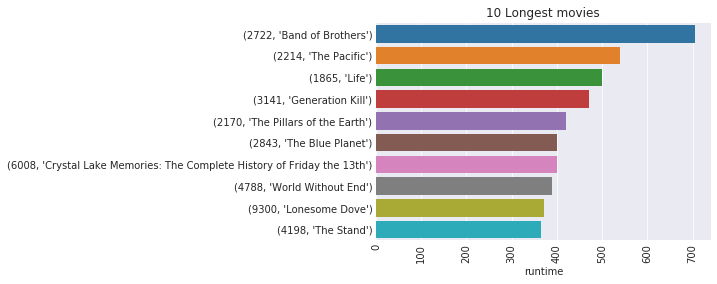

In [393]:
sns.barplot(x='runtime', y=top10_runtime.index, data=top10_runtime);
plt.title('10 Longest movies')
plt.xticks(rotation=90);

The above bar chart demonstrates the top 10 longest movies all over the report period, with 'Band of Brothers', directed by 
Phil Alden Robinson|Richard Loncraine|Mikael S,' the longest released 2001 with exceeding 11 hrs.

In [394]:
df['director'].value_counts().head(10)

Woody Allen          40
Clint Eastwood       33
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      20
Barry Levinson       19
Brian De Palma       19
Name: director, dtype: int64

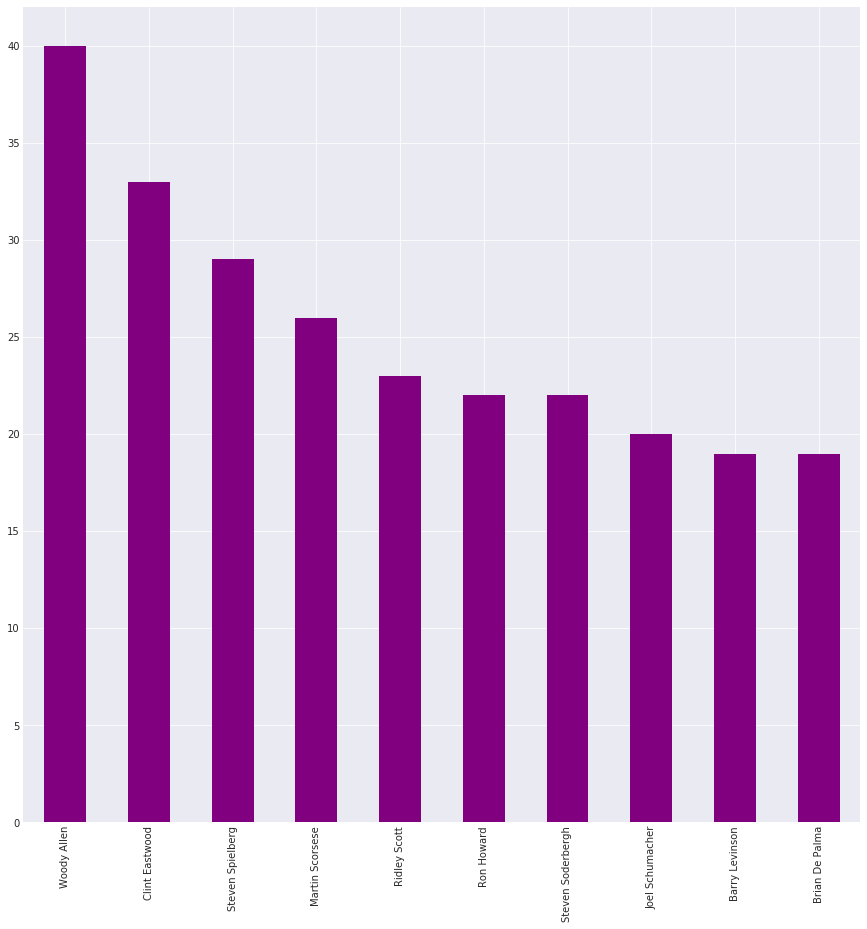

In [395]:
df['director'].value_counts().head(10).plot.bar(figsize=(15,15), color = 'purple');

This reveals the top 10 directors with the most no. of movies, starting with 'Woody Allen' with  a total of '40' movies ending with 'Brian De Palma' with '19 movies'.

In [396]:
df[df['revenue'].max()==df['revenue']]['original_title']

1386    Avatar
Name: original_title, dtype: object

### Research Questions - 4
**Whcih movies with the highest votes and can be classified as 'Excellent' ? Which with meduim votes and can be rated as Good? Which were with the lowest number of votes and can be average **

In [397]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'release_year'],
      dtype='object')

In [398]:
# Clarify the range within the movies; votes : 
df.describe().vote_count

count    8666.000000
mean      264.204823
std       635.195808
min        10.000000
25%        20.000000
50%        54.000000
75%       200.000000
max      9767.000000
Name: vote_count, dtype: float64

In [399]:
# From above, we can notice : - min, 25%, 50%, 75% as well as the max
def votes (vote_count) :
    if vote_count>=200 :
        return "Excellent"
    elif vote_count>=40 :
        return "Good"
    else :
        return "Average"

In [400]:
# Creating a new column 'Vote_Category' for the new created categories and  Applying the above user defined function using the apply method 
df['Vote_Category'] = df['vote_count'].apply(votes)

In [401]:
# Check the first data row to have the new column 'Vote_Category' with the new created categories
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,release_year,Vote_Category
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Excellent


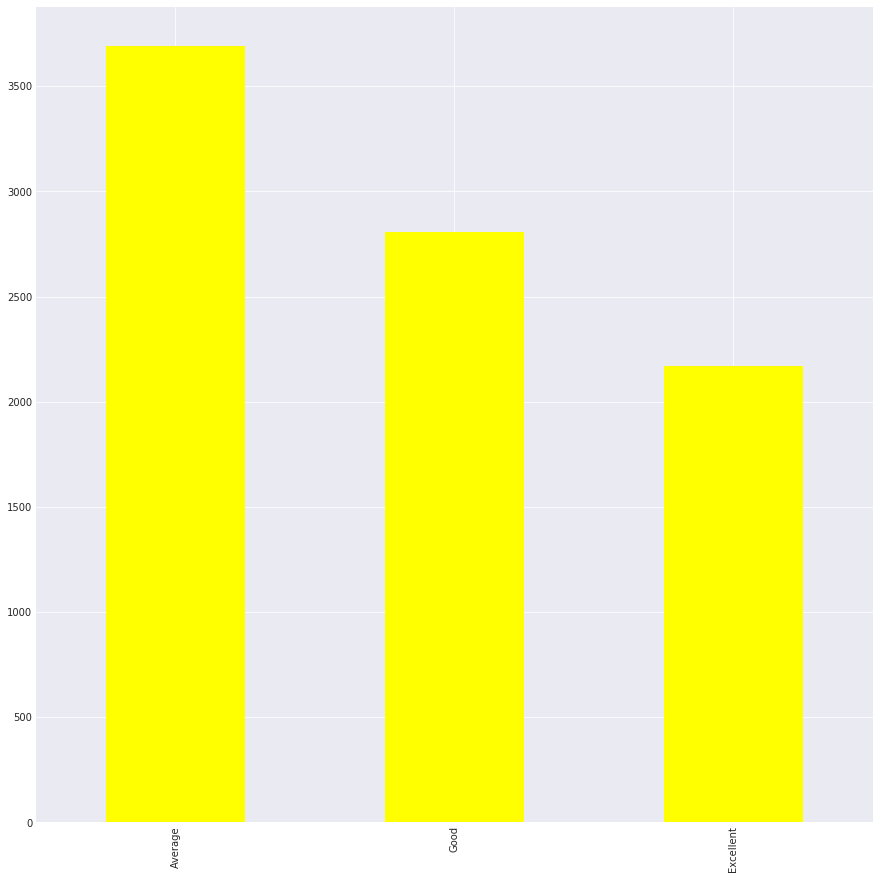

In [402]:
df['Vote_Category'].value_counts().plot.bar(figsize=(15,15), color = 'yellow');

### Research Questions - 5 
**Whether The Revenue associated with the Categorical votes ?**

In [403]:
Excellent = df.Vote_Category == 'Excellent'
Good = df.Vote_Category == 'Good'
Average = df.Vote_Category == 'Average'

In [404]:
df.revenue[Excellent].mean()

165551571.10931733

In [405]:
df.revenue[Good].mean()

20644673.377761938

In [406]:
df.revenue[Average].mean()

2693365.7819609968

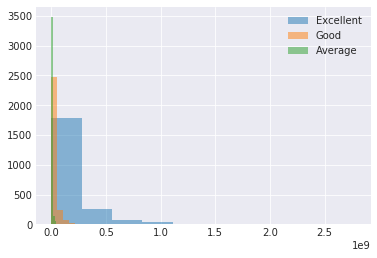

In [407]:
df.revenue[Excellent].hist(alpha=0.5, label='Excellent')
df.revenue[Good].hist(alpha=0.5, label='Good')
df.revenue[Average].hist(alpha=0.5, label='Average')
plt.legend();

This illustrates that Movies with higher vote counts don't necessarily lead to higher revenues.

### Research Questions 5 
**How many Movies have been relesed for each Genre ?**

In [408]:
# Check genres 
df['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [409]:
# Creating a new list to have splitted values, splited by '|' as cleared above
list1 = []
for value in df['genres']:
    list1.append(value.split('|'))

In [410]:
# Check splitted values
list1

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

In [411]:
list_genres = []
for item in list1:
    for item1 in item:
        list_genres.append(item1)

In [412]:
list_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [413]:
# Appending unique values found in 'list_genres', in a new list 'unique_list'
unique_list = []
for item in list_genres:
    if item not in unique_list:
        unique_list.append(item)

In [414]:
# Finding unique values in list_genres
unique_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [415]:
# Count of unique list value
len(unique_list)

20

In [416]:
from collections import Counter

In [417]:
Counter(list_genres)

Counter({'Action': 2022,
         'Adventure': 1271,
         'Science Fiction': 1028,
         'Thriller': 2462,
         'Fantasy': 763,
         'Crime': 1200,
         'Western': 154,
         'Drama': 3934,
         'Family': 946,
         'Animation': 512,
         'Comedy': 3050,
         'Mystery': 703,
         'Romance': 1415,
         'War': 235,
         'History': 287,
         'Music': 309,
         'Horror': 1339,
         'Documentary': 270,
         'TV Movie': 115,
         'Foreign': 90})

In [418]:
df_genres = (list_genres)

##### Research Questions - 6
**Whcih Production Comapnies released the most no. of movies ?  **

In [419]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'release_year', 'Vote_Category'],
      dtype='object')

In [420]:
df['production_companies'].nunique()

6599

In [421]:
df['production_companies'].value_counts().head(10)

Paramount Pictures                        151
Universal Pictures                        120
Warner Bros.                               79
Columbia Pictures                          71
Metro-Goldwyn-Mayer (MGM)                  68
Walt Disney Pictures                       59
New Line Cinema                            58
Touchstone Pictures                        47
Twentieth Century Fox Film Corporation     46
TriStar Pictures                           45
Name: production_companies, dtype: int64

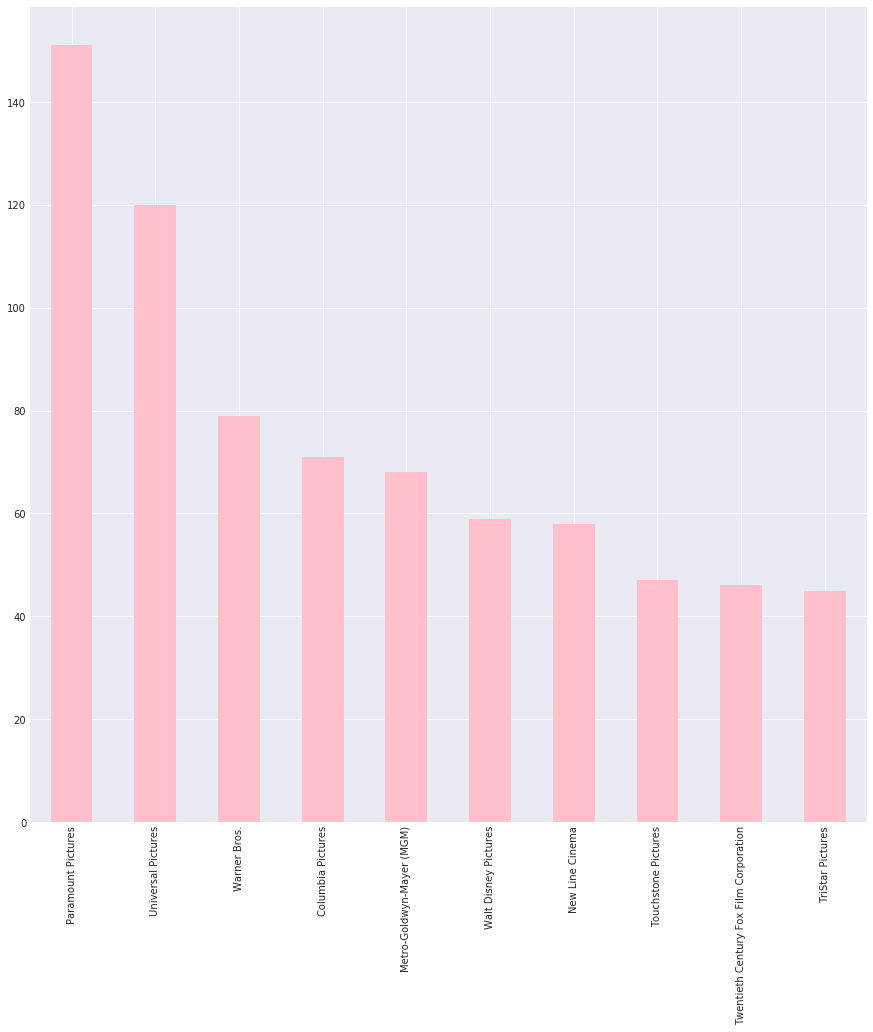

In [422]:
df['production_companies'].value_counts().head(10).plot.bar(figsize=(15,15), color = 'pink');

This reveals the top 10 Production companies with the most no. of movies, starting with 'Paramount Pictures' with  a total of '151' movies, then 'Universal Pictures with '120' movies, followed by 'Warner Bros.' with a total of '79' movies.

### Research Questions - 7 
**Releationships among revenues, popularity as well as vote_counts. **

**A quick look at releationships**

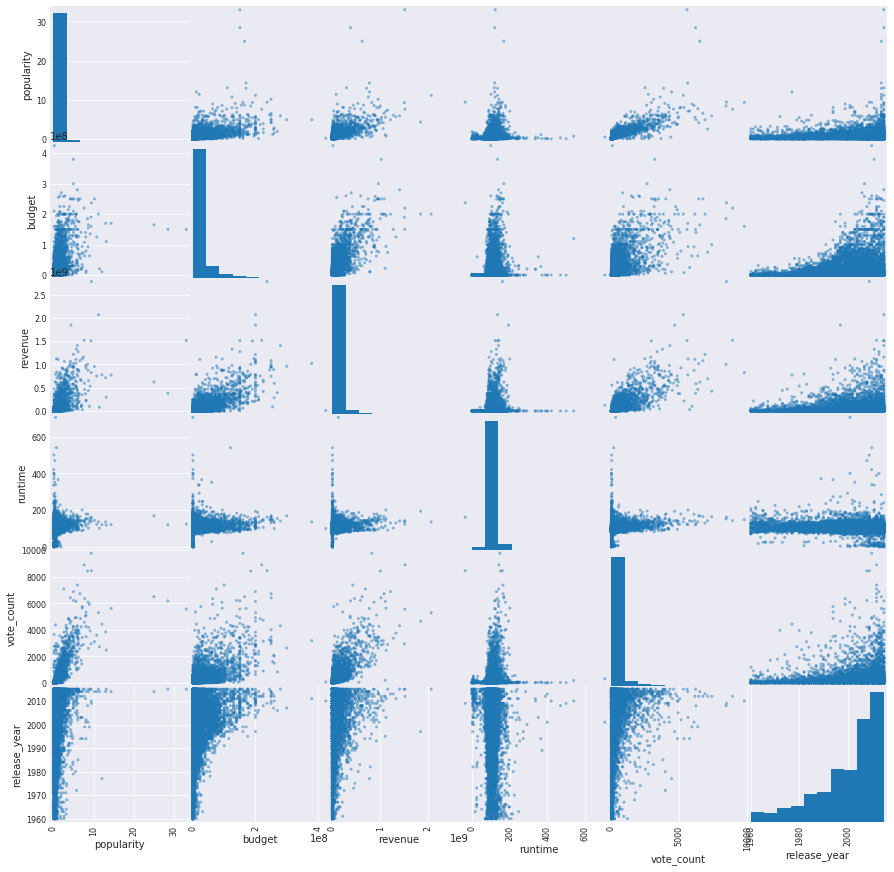

In [423]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

#### **Does Popularity affect Revenue **? 

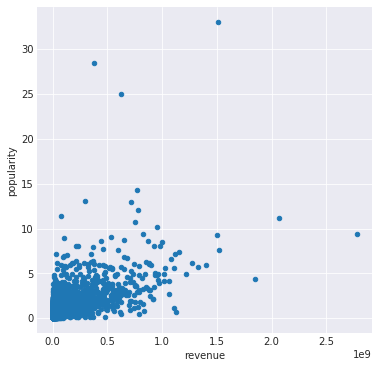

In [424]:
df.plot(x='revenue', y='popularity', kind='scatter', figsize=(6,6));

This indicates a positive Correlation between 'Popularity' and 'Revenue'm

**Does Runtime affect Budget ?**

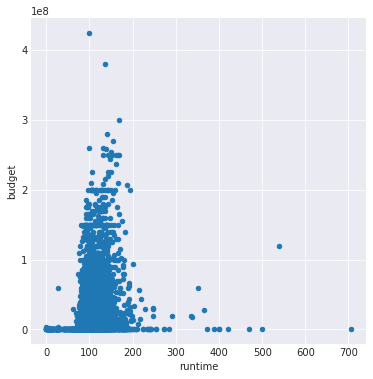

In [425]:
df.plot(x='runtime', y='budget', kind='scatter', figsize=(6,6));

## Conclusion

**In this investigation, we were able to have a look on the Movie industry all over the this period, to find that no. of movies released increased by time. Also  vote counts have been increasing over years referring the more contribution with movies voting .The movies budget were increasing as well in general over time.
It was clear that The last quarter of the year always show the most movies release. 
Also We were able to go through the total no. of movies for each genre over this period.**

**Summary Analysis :
The highest average votes were in 2012. 
The highest average revenues were in 2003 as well as 2004. 
Year 2000 was with the most costly budget for movie industry.
'Jurassic World' was the most popular movie. 
The longest movie was 'Band of Brothers'.
The director with the most no. of movies was 'Woody Allen'.
'Paramount Pictures' was at the top of the Production companies with the most releasing no. of movies.
'Action' was the most released genre among all.** 

**Quick Obesravtions:
There is also a correlation between runtime and budject as well as popularity and revenue.**

## Limitations

- There were a lot of '0' values in the 'Budget' column that may mislead the results.
- Didn't find any correlation between 'Popularity' and release year.
- Didn't find any correlation between 'votes' and revenues.